In [2]:
import pandas as pd

In [3]:
factory = pd.read_csv('/content/Factory_Salary.csv')

In [4]:
factory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             264 non-null    object 
 1   Profession       264 non-null    object 
 2   Rank             264 non-null    int64  
 3   Equipment        264 non-null    object 
 4   Insalubrity      264 non-null    int64  
 5   Size_Production  264 non-null    int64  
 6   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.6+ KB


In [5]:
factory.describe()

,Rank,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000
mean,4.909091,15.681818,988.333333,21030.461230
std,1.313600,6.682726,231.372715,4323.920780
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,11.000000,805.000000,17830.000000
50%,5.000000,18.000000,985.000000,20350.000000
75%,6.000000,22.000000,1185.000000,23818.014706
max,7.000000,22.000000,1400.000000,33157.058824


In [6]:
factory = factory.drop(['Date'], axis=1)

In [7]:
#one-hot encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
factory["Profession"]=le.fit_transform(factory["Profession"])
factory["Equipment"]=le.fit_transform(factory["Equipment"])

In [8]:
factory.describe()

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,4.363636,4.909091,3.090909,15.681818,988.333333,21030.461230
std,2.677246,1.313600,1.381323,6.682726,231.372715,4323.920780
min,0.000000,3.000000,0.000000,0.000000,580.000000,12180.000000
25%,2.000000,4.000000,2.000000,11.000000,805.000000,17830.000000
50%,4.000000,5.000000,3.000000,18.000000,985.000000,20350.000000
75%,7.000000,6.000000,4.000000,22.000000,1185.000000,23818.014706
max,8.000000,7.000000,5.000000,22.000000,1400.000000,33157.058824


<ipython-input-9-f94068a0be3f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(factory['Insalubrity'])
<ipython-input-9-f94068a0be3f>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(factory['Size_Production'])
<ipython-input-9-f94068a0be3f>:20: UserWarning: 

`distplot` is a deprecated funct

Text(0.5, 1.0, 'Salary')

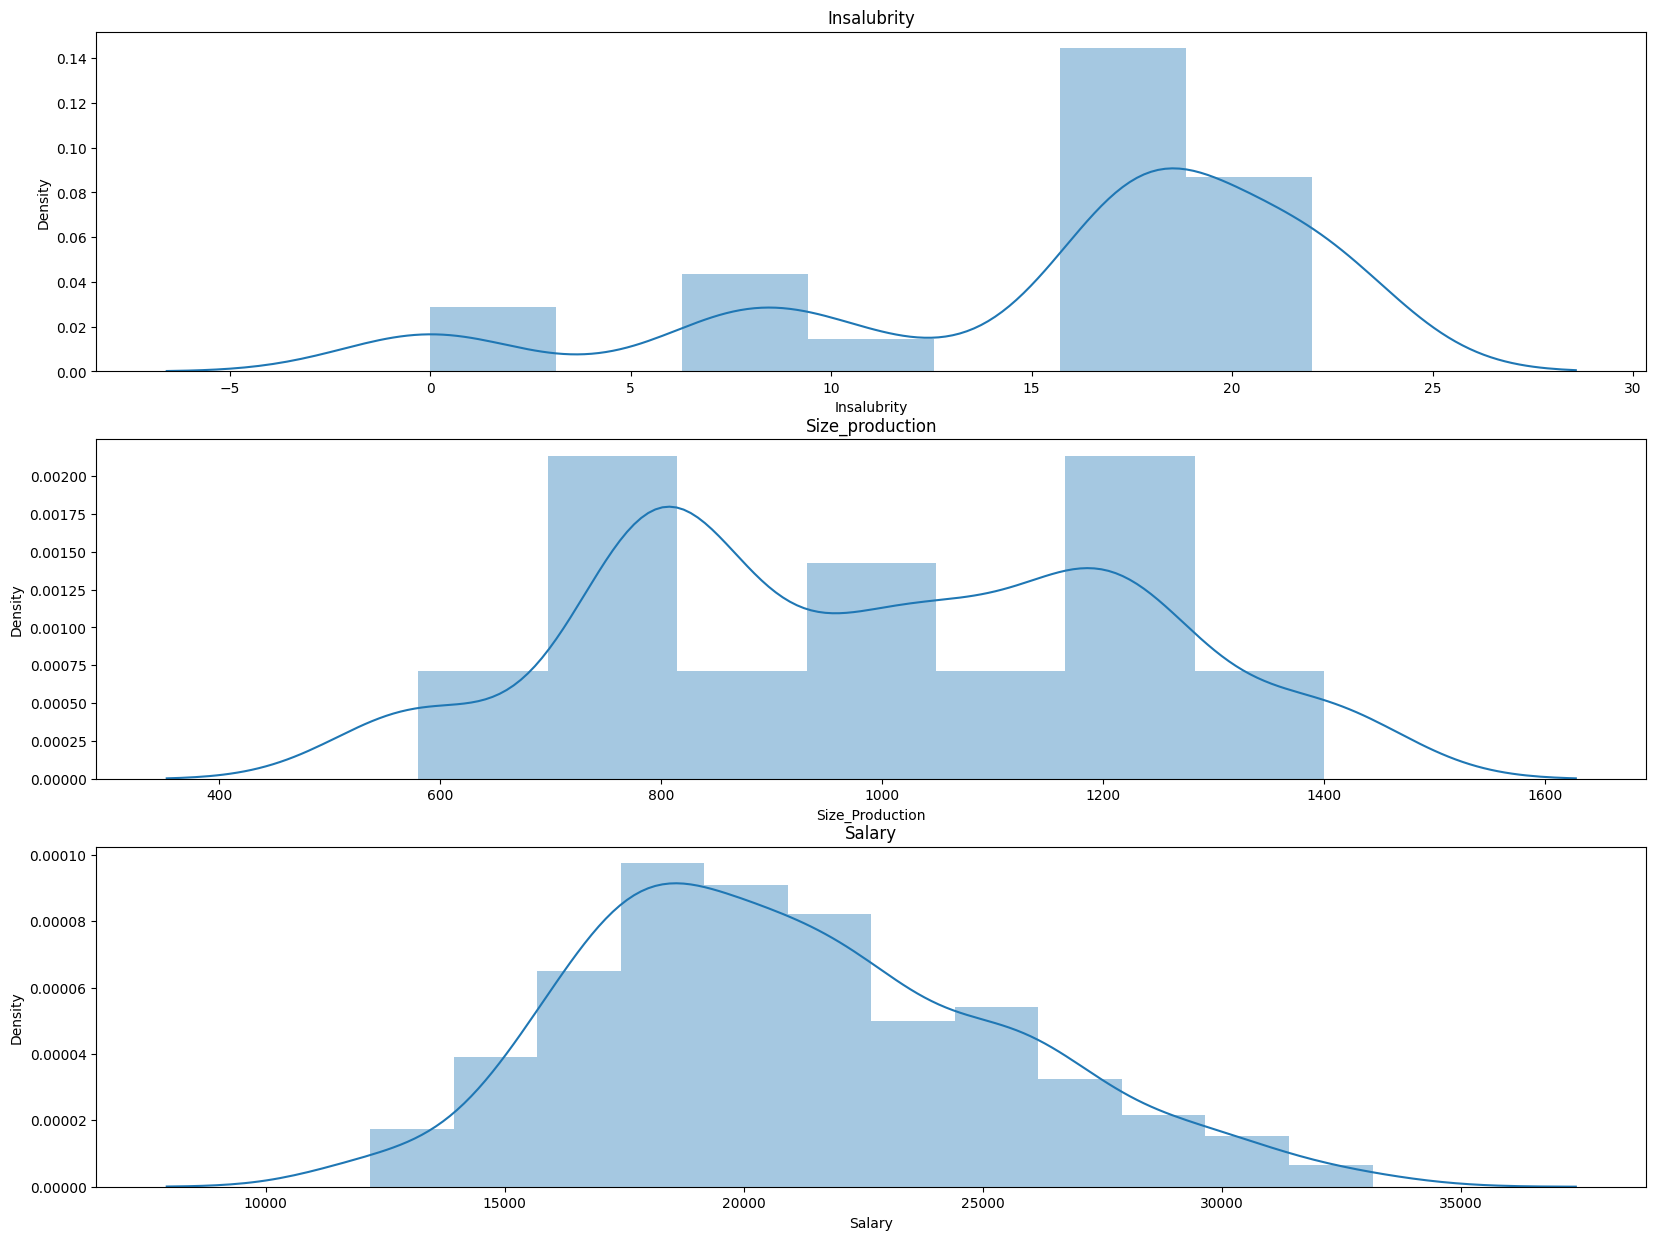

In [9]:
#frequency Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(3,1, figsize=(20,15))


plt.subplot(3,1,1)
sns.distplot(factory['Insalubrity'])
plt.title("Insalubrity")

plt.subplot(3,1,2)
sns.distplot(factory['Size_Production'])
plt.title("Size_production")

plt.subplot(3,1,3)
sns.distplot(factory['Salary'])
plt.title("Salary")

Text(0.5, 1.0, 'Salary')

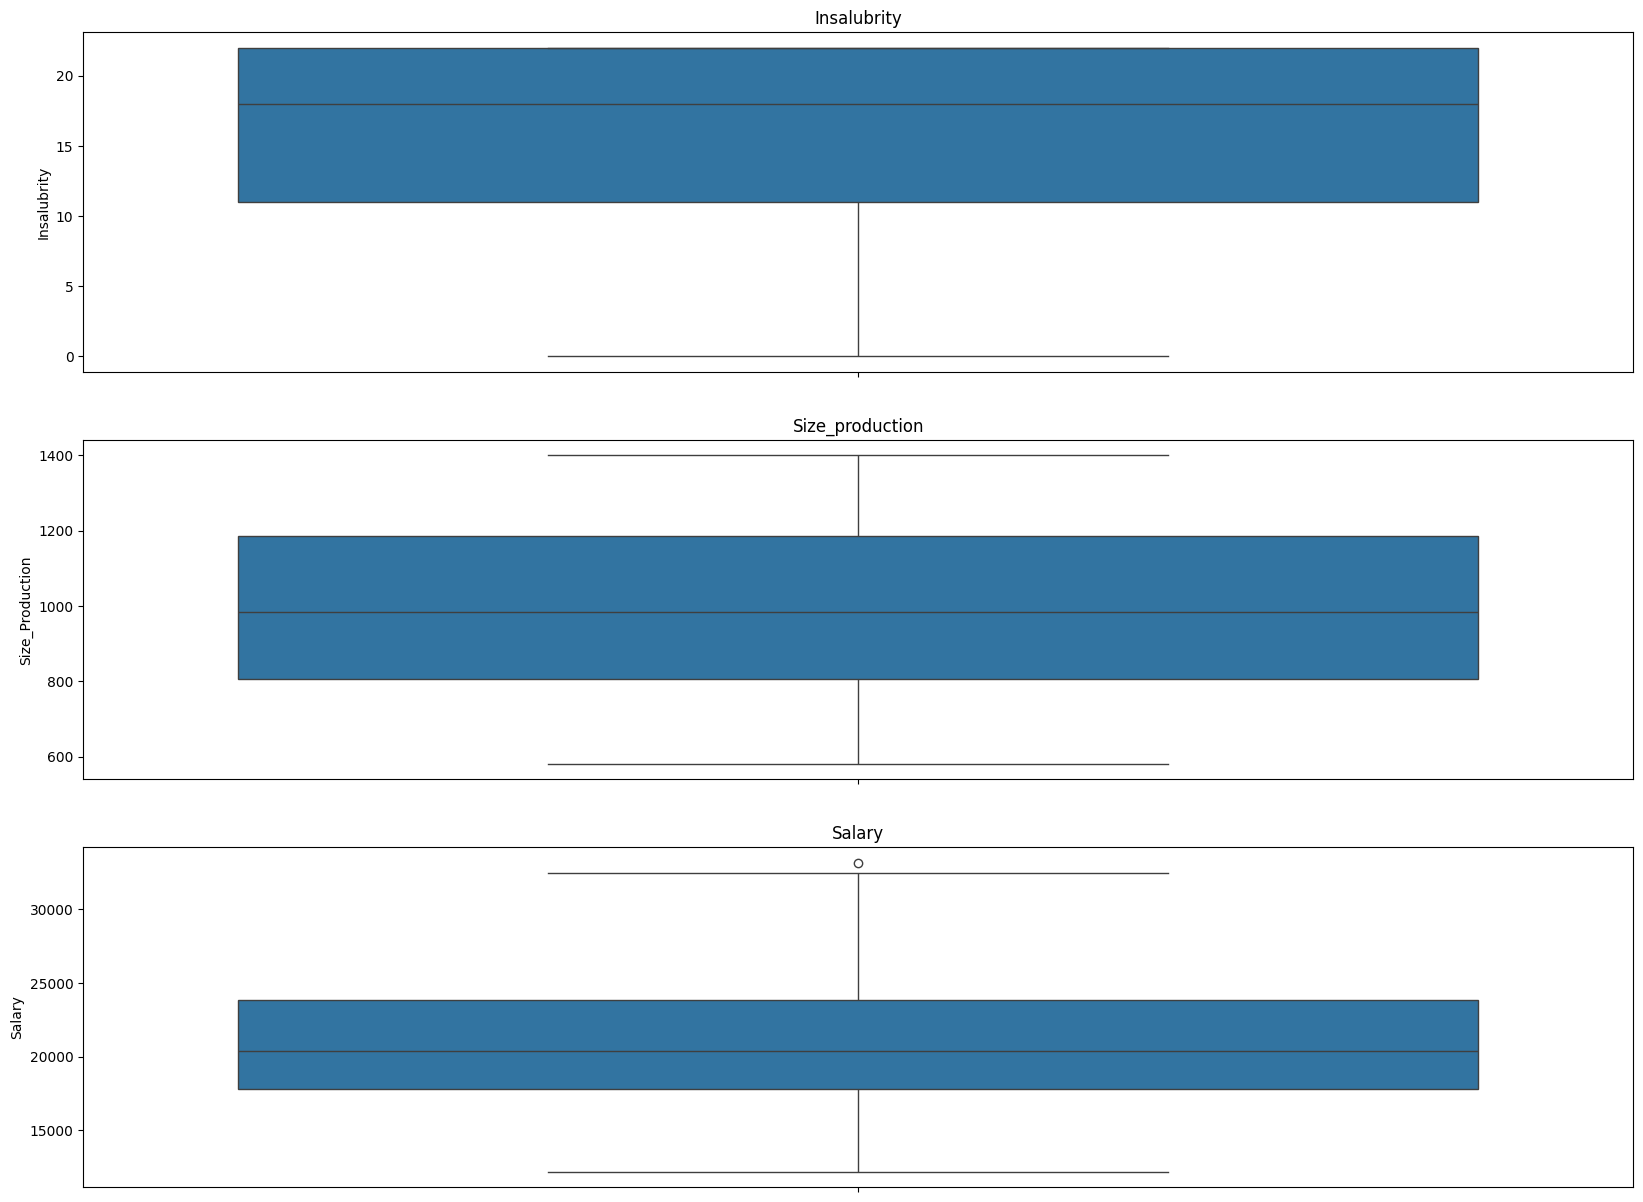

In [10]:
fig, axes = plt.subplots(3,1, figsize=(20,15))


plt.subplot(3,1,1)
sns.boxplot(factory['Insalubrity'])
plt.title("Insalubrity")

plt.subplot(3,1,2)
sns.boxplot(factory['Size_Production'])
plt.title("Size_production")

plt.subplot(3,1,3)
sns.boxplot(factory['Salary'])
plt.title("Salary")

<Axes: >

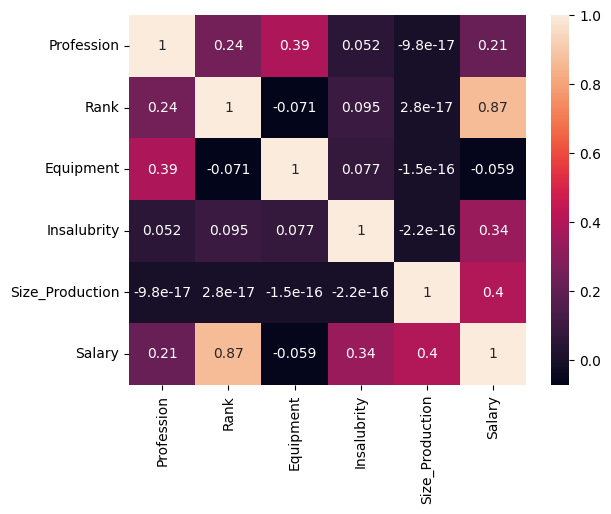

In [11]:
sns.heatmap(factory.corr(), annot=True)

In [12]:
#dependent and independent features - For Feature Selection using RFECV
X = factory.drop(['Salary'], axis=1)
y = factory['Salary']

In [13]:
#Recursive Feature Selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold

rfe = RFE(DecisionTreeRegressor(), n_features_to_select=3)

In [14]:
rfe.fit(X, y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)

In [15]:
rfe.ranking_

array([3, 1, 2, 1, 1])

In [16]:
rfe.get_support()

array([False,  True, False,  True,  True])

In [17]:
feature_selected = X.columns[rfe.get_support()]
feature_selected

Index(['Rank', 'Insalubrity', 'Size_Production'], dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

In [20]:
model = DecisionTreeRegressor()

In [21]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
pred = model.predict(X_test)

In [23]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
#mean squared error
mse = mean_squared_error(y_test, pred)
print(mse)

163260.22201557102


In [29]:
print(mse)
print(mae)
print(r2)

163260.22201557102
192.6125000000001
0.993169445092217


In [25]:
#mean absolute error
mae = mean_absolute_error(y_test, pred)
print(mae)

192.6125000000001


In [26]:
#r2 score
r2 = r2_score(y_test, pred)
print(r2)

0.993169445092217


In [27]:
y_test[0:5]

,Salary
95,18285.882353
12,17370.000000
164,20001.705882
176,21847.470588
51,22260.000000


In [28]:
pred[0:5]

array([17927.64705882, 17370.        , 20001.70588235, 21269.        ,
       22260.        ])

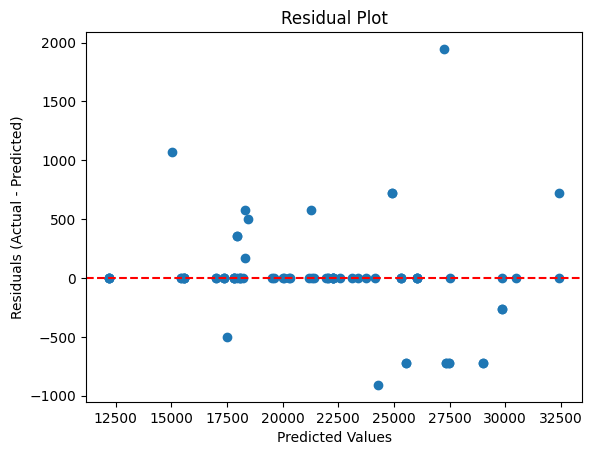

In [32]:
# Calculate residuals
residuals = y_test - pred  # Assuming pred are predictions on test set

plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

- Model is much more accurate for cheaper items (near 15K) than expensive ones (~30K).